In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as stl
from sklearn.datasets import load_boston
import seaborn as sns

importing dataset

In [2]:
url='https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
names=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B 1000(Bk - 0.63)^2','LSTAT %','MEDV']
df=pd.read_csv(url,names=names,sep='\s+')

In [3]:
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B 1000(Bk - 0.63)^2,LSTAT %,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [83]:
#sns.pairplot(df)

In [4]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
x.shape

(506, 13)

In [5]:
#print(pd.DataFrame(x))

Splitting datasets in training and test set

In [6]:
from sklearn.model_selection import train_test_split
validation=0.20
seed=42
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=validation,random_state=seed)
#np.transpose(x_train).shape

In [7]:
#y_test=y_test.reshape(-1,1)
#y_train=y_train.reshape(-1,1)

Feature scaling of data

In [8]:
# from sklearn.preprocessing import StandardScaler
# sc=StandardScaler()
# x_train[::]=sc.fit_transform(x_train[::])
# x_test[::]=sc.transform(x_test[::])
# y_train[::]=sc.fit_transform(y_train[::])
# y_test[::]=sc.transform(y_test[::])

In [9]:
print(x_train)
print(x_test)

[[1.50234e+01 0.00000e+00 1.81000e+01 ... 2.02000e+01 3.49480e+02
  2.49100e+01]
 [6.27390e-01 0.00000e+00 8.14000e+00 ... 2.10000e+01 3.95620e+02
  8.47000e+00]
 [3.46600e-02 3.50000e+01 6.06000e+00 ... 1.69000e+01 3.62250e+02
  7.83000e+00]
 ...
 [1.50100e-02 8.00000e+01 2.01000e+00 ... 1.70000e+01 3.90940e+02
  5.99000e+00]
 [1.11604e+01 0.00000e+00 1.81000e+01 ... 2.02000e+01 1.09850e+02
  2.32700e+01]
 [2.28760e-01 0.00000e+00 8.56000e+00 ... 2.09000e+01 7.08000e+01
  1.06300e+01]]
[[9.17800e-02 0.00000e+00 4.05000e+00 ... 1.66000e+01 3.95500e+02
  9.04000e+00]
 [5.64400e-02 4.00000e+01 6.41000e+00 ... 1.76000e+01 3.96900e+02
  3.53000e+00]
 [1.05740e-01 0.00000e+00 2.77400e+01 ... 2.01000e+01 3.90110e+02
  1.80700e+01]
 ...
 [1.40507e+01 0.00000e+00 1.81000e+01 ... 2.02000e+01 3.50500e+01
  2.12200e+01]
 [5.18800e-02 0.00000e+00 4.49000e+00 ... 1.85000e+01 3.95990e+02
  1.28600e+01]
 [9.51200e-02 0.00000e+00 1.28300e+01 ... 1.87000e+01 3.83230e+02
  8.94000e+00]]


In [10]:
print(y_train)
print(y_test)

[12.  19.9 19.4 13.4 18.2 24.6 21.1 24.7  8.7 27.5 20.7 36.2 31.6 11.7
 39.8 13.9 21.8 23.7 17.6 24.4  8.8 19.2 25.3 20.4 23.1 37.9 15.6 45.4
 15.7 22.6 14.5 18.7 17.8 16.1 20.6 31.6 29.1 15.6 17.5 22.5 19.4 19.3
  8.5 20.6 17.  17.1 14.5 50.  14.3 12.6 28.7 21.2 19.3 23.1 19.1 25.
 33.4  5.  29.6 18.7 21.7 23.1 22.8 21.  48.8 14.6 16.6 27.1 20.1 19.8
 21.  41.3 23.2 20.4 18.5 29.4 36.4 24.4 11.8 13.8 12.3 17.8 33.1 26.7
 13.4 14.4 50.  22.  19.9 23.8 17.5 12.7  5.6 31.1 26.2 19.4 16.7 13.8
 22.9 15.3 27.5 36.1 22.9 24.5 25.  50.  34.9 31.7 24.1 22.1 14.1 42.8
 19.3 32.2 26.4 21.8 21.7  8.3 46.7 43.1 31.5 10.5 16.7 20.  33.3 17.8
 50.  20.5 23.2 13.1 19.6 22.8 28.7 30.7 22.9 21.9 23.9 32.7 24.3 21.5
 24.6  8.5 26.4 23.1 15.   8.8 19.3 23.9 24.7 19.8 23.8 13.3 29.  27.1
 34.6 13.3 15.6 12.5 14.6 11.  24.8 17.3  8.1 21.4 15.6 23.3 32.  38.7
 30.1 20.5 32.5 42.3 24.3 20.6 22.  18.2 15.   6.3 20.1 21.4 28.4 30.1
 20.8 23.  14.3 11.7 37.3 17.1 10.4 23.  22.7 20.3 21.7 50.   8.4 18.8
 37.2 1

Training model by multiplelinear regresion

In [11]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
y_pred=regressor.predict(x_test)
np.printoptions(precision=2)
pred_diff=y_test.reshape(len(y_test),1)-y_pred.reshape(len(y_pred),1)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1),pred_diff),axis=1))


[[ 2.89967236e+01  2.36000000e+01 -5.39672362e+00]
 [ 3.60255653e+01  3.24000000e+01 -3.62556534e+00]
 [ 1.48169440e+01  1.36000000e+01 -1.21694405e+00]
 [ 2.50319792e+01  2.28000000e+01 -2.23197915e+00]
 [ 1.87698799e+01  1.61000000e+01 -2.66987992e+00]
 [ 2.32544293e+01  2.00000000e+01 -3.25442929e+00]
 [ 1.76625382e+01  1.78000000e+01  1.37461818e-01]
 [ 1.43411900e+01  1.40000000e+01 -3.41190000e-01]
 [ 2.30132070e+01  1.96000000e+01 -3.41320703e+00]
 [ 2.06324560e+01  1.68000000e+01 -3.83245597e+00]
 [ 2.49085051e+01  2.15000000e+01 -3.40850512e+00]
 [ 1.86388365e+01  1.89000000e+01  2.61163547e-01]
 [-6.08842184e+00  7.00000000e+00  1.30884218e+01]
 [ 2.17583467e+01  2.12000000e+01 -5.58346681e-01]
 [ 1.92392258e+01  1.85000000e+01 -7.39225759e-01]
 [ 2.61931973e+01  2.98000000e+01  3.60680267e+00]
 [ 2.06477331e+01  1.88000000e+01 -1.84773313e+00]
 [ 5.79472718e+00  1.02000000e+01  4.40527282e+00]
 [ 4.05003397e+01  5.00000000e+01  9.49966034e+00]
 [ 1.76128907e+01  1.41000000e+

In [93]:
print(regressor.coef_)
print(regressor.intercept_)

[-1.13055924e-01  3.01104641e-02  4.03807204e-02  2.78443820e+00
 -1.72026334e+01  4.43883520e+00 -6.29636221e-03 -1.44786537e+00
  2.62429736e-01 -1.06467863e-02 -9.15456240e-01  1.23513347e-02
 -5.08571424e-01]
30.246750993923698


In [15]:
# d={'prediction':[y_pred.reshape(len(y_pred),1)],'Test set':[y_test],'prediction diff':[(y_test-y_pred)]}
# print(pd.DataFrame([y_pred,y_test,y_test-y_pred],columns=['a','b','c']))

visualising traing data

In [30]:
x_test.size,y_test.size,pred_diff.size

(1326, 102, 102)

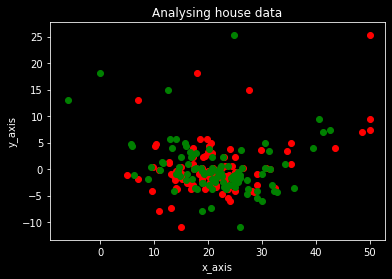

In [33]:
stl.use('dark_background')
plt.scatter(y_test,pred_diff,color='r')
plt.scatter(y_pred,pred_diff,color='g')
plt.title('Analysing house data')
plt.xlabel('x_axis')
plt.ylabel('y_axis')
plt.show()

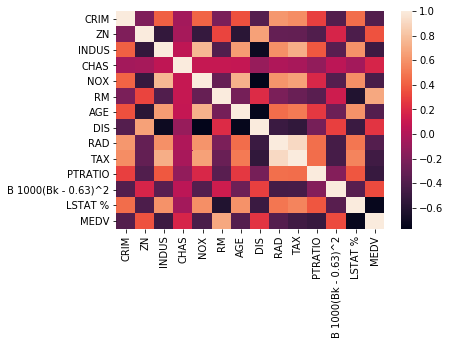

In [64]:
# sns.heatmap(df.corr())